# Brownian Motion

---

## **1. From Random Walk to Brownian Motion**

The **standard symmetric random walk** on the real line is an example of a **Markov chain** whose state space is the set of integers:

$$
\{\ldots, -3, -2, -1, 0, 1, 2, 3, \ldots\}.
$$

We define it as follows:

- Start with $X_0 = 0$.
- Given $X_0, \ldots, X_t$, define
  $$
  X_{t+1} = X_t \pm 1
  $$
  with each possibility having probability $1/2$.

---

## **2. Scaling to Obtain Brownian Motion**

**Standard Brownian motion** starting at 0 can be viewed as a **rescaled random walk** in both time and position.

Let $\Delta > 0$ be a very small time step.  
We define a random function on $[0, \infty)$ by first defining its values at discrete points:

$$
t = 0, \Delta, 2\Delta, 3\Delta, \ldots
$$

Start with $X_0 = 0$ and define recursively:

$$
X_{(n+1)\Delta} = X_{n\Delta} \pm \sqrt{\Delta}
$$

with equal probabilities.

Equivalently, let $\delta_1, \delta_2, \ldots$ be iid random variables taking values $\pm1$ with equal probability, and define

$$
X_n = X_0 + \delta_1 \sqrt{\Delta} + \delta_2 \sqrt{\Delta} + \cdots + \delta_n \sqrt{\Delta}
= \sqrt{\Delta} \sum_{i=1}^n \delta_i.
$$

We define $X_t$ for all $t \ge 0$ by **linear interpolation** between the discrete time points.

This gives an **approximate Brownian motion sample path.**  
Actual Brownian motion is obtained by taking $\Delta \to 0$ — i.e., making time steps infinitesimally small.

---

## **3. Properties of Brownian Motion**

When we take $\Delta \to 0$, we obtain random functions $X_t, t \ge 0$, satisfying:

1. **Independent Increments:**  
   Given $0 = t_0 < t_1 < t_2 < \cdots < t_n < \infty$,  
   the random variables
   $$
   X_{t_1} - X_{t_0},\; X_{t_2} - X_{t_1},\; \ldots,\; X_{t_n} - X_{t_{n-1}}
   $$
   are independent.

2. **Normality:**  
   For any $0 < s < t < \infty$,
   $$
   X_t - X_s \sim N(0, t - s).
   $$

3. **Continuity:**  
   The sample paths $t \mapsto X_t$ are continuous with probability 1.

---

### Intuitive Explanation

The **independent increments** property is easiest to see if we think of the infinitesimal random walk approximation.

If $0 < s < t < \infty$, take integers $n$ and $m$ such that $s \approx n\Delta$ and $t \approx m\Delta$. Then

$$
X_t - X_s
= \sqrt{\Delta} \sum_{i=m+1}^n \delta_i.
$$

For non-overlapping time intervals, the sets of $\delta_i$’s do not overlap, so increments are independent.

---

### Normality from the Central Limit Theorem

We can write

$$
X_t - X_s
= \sqrt{\Delta} \sum_{i=m+1}^n \delta_i
= \sqrt{n - m} \sqrt{\Delta}
\left( \frac{1}{\sqrt{n - m}} \sum_{i=m+1}^n \delta_i \right)
$$

The term $\sqrt{n - m} \sqrt{\Delta}$ is approximately $\sqrt{t - s}$ as $\Delta \to 0$.

Since each $\delta_i$ has mean 0 and variance 1, and there are $n - m$ such terms, the term in parentheses converges (by the **Central Limit Theorem**) to $N(0,1)$.

Hence, in the limit:

$$
X_t - X_s \sim N(0, t - s).
$$

---

### ✳️ Continuity

Continuity of the paths is more technical to prove — it requires showing that in the limit as $\Delta \to 0$, the random walk interpolation converges uniformly to a continuous function.  
We simply note that Brownian motion has continuous sample paths with probability 1.

---

## **4. Approximating Brownian Motion Sample Paths**

The infinitesimal construction suggests a practical way to **simulate approximate Brownian motion** on a finite interval $[0, T]$.

---

### **Algorithm**

1. **Choose time step:**  
   Fix a small time increment  
   $$
   \Delta = \frac{T}{N}
   $$
   where $N$ is a large integer.

2. **Generate random steps:**  
   Generate iid random variables $\delta_i$, $i = 1, \ldots, N$,  
   where $\delta_i = \pm 1$ with equal probability.

3. **Construct partial sums:**  
   Define
   $$
   X_{n\Delta} = \sqrt{\Delta} \sum_{i=1}^n \delta_i,
   \quad n = 1, 2, \ldots, N.
   $$

4. **Interpolate:**  
   For $t \in [0, T]$ not of the form $n\Delta$, define $X_t$ by **linear interpolation** between nearest time points.

---

### **Alternative Step Distribution**

By the **Central Limit Theorem**, the distribution of increments matters only through its mean and variance.

Hence, instead of $\delta_i = \pm 1$, we can use any iid random variables with mean 0 and variance 1.

In particular, we can take $\delta_i \sim N(0,1)$.

This gives smoother approximations and directly matches the Normal distribution of Brownian increments.

---

## **Summary**

| Property | Description |
|-----------|--------------|
| **Origin** | Limit of symmetric random walk as $\Delta \to 0$ |
| **Increment Distribution** | $X_t - X_s \sim N(0, t-s)$ |
| **Independent Increments** | Increments over disjoint intervals are independent |
| **Continuity** | Paths are continuous almost surely |
| **Simulation Idea** | Discrete random walk with step size $\sqrt{\Delta}$ and small $\Delta$ |
| **Alternative Increments** | Can use $\delta_i \sim N(0,1)$ for Gaussian increments |

---

 **In short:**  
Brownian motion can be viewed as the limit of a scaled random walk with step size $\sqrt{\Delta}$ and time step $\Delta$, producing a continuous stochastic process with independent, normally distributed increments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Simulating Brownian motion sample paths**

As we discussed in the lectures, we can simulate *standard* Brownian motion $B_t,$ for $t$ in the time interval $[0,T]$ starting at the value $B_0$ using a grid subdivided into $N$ intervals using the following:

1. Define the time increment $\Delta = 1/N.$
2. Generate iid random variables $\delta_i, i=1,\ldots,N$ distributed $N(0,1)$
3. Define $B_{j\Delta} = B_0+\sqrt{\Delta}\sum_{i=1}^j \delta_j$ for $j=1,\ldots,N.$

This leads us to be able to use the following function to generate a *realization* of one of these Brownian motion sample paths. This function takes as arguments

- B0 = starting point for the sample path at time 0
- T = end time for the path 
- N = number of intervals in which to break up the time interval $[0,T]$

and returns two 1-d numpy arrays. 

- the array of $N+1$ equispaced time points from 0 to T.
- the array of positions of the path at each time point

In [2]:
import numpy as np
def BMrealization(B0,T,N):
    Delta=1/N
    rtDelta=np.sqrt(Delta)
    delta=np.random.normal(0,1,size=N)
    delta=np.insert(delta,0,0)
    B=np.cumsum(delta)*rtDelta
    T=np.linspace(0,T,N+1)
    return T,B

Here we plot some realizations of Brownian motion starting from 0.

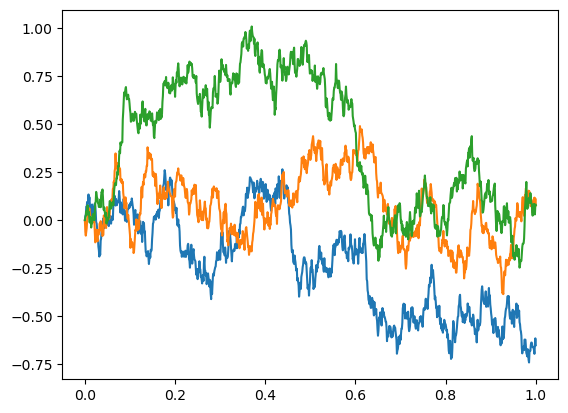

In [3]:
import matplotlib.pyplot as plt
T,B0=BMrealization(0,1,1000)
T,B1=BMrealization(0,1,1000)
T,B2=BMrealization(0,1,1000)
plt.plot(T,B0)
plt.plot(T,B1)
plt.plot(T,B2)

plt.show()

## **Brownian Motion with Drift and Volatility**

Define a new process:

$$
Y_t = Y_0 + \mu t + \sigma B_t
$$

where:
- $\mu$ is the **drift parameter**  
- $\sigma$ is the **volatility parameter**

Then for $0 < s < t$:

$$
Y_t - Y_s = \mu (t-s) + \sigma (B_t - B_s)
$$

and since $B_t - B_s \sim N(0, t-s)$:

$$
Y_t - Y_s \sim N(\mu (t-s), \sigma^2 (t-s)).
$$

---

### **Problem 1**

Write a function that takes as input:
- $Y_0$: starting position  
- $T$: time interval  
- $N$: number of steps ($\Delta = T/N$)  
- $\mu$: drift parameter  
- $\sigma$: volatility parameter  

and returns:
- `Tvec`: array of time values $[0, \Delta, 2\Delta, \ldots, T]$  
- `Yvec`: simulated Brownian motion with drift $\mu$ and volatility $\sigma$.
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def BM(Y0,T,N,mu,sigma):
    Delta=T/N
    rtDelta=np.sqrt(Delta)
    delta=np.random.normal(0,1,size=N)
    delta=np.insert(delta,0,0)
    Y=np.cumsum(delta)*rtDelta
    T=np.linspace(0,T,N+1)
    Y=Y0+mu*T+sigma*Y
    return T,Y

### **Problem 2**

Generate 3 realizations of the process on $[0, 5]$ with:
- $Y_0 = 100, \sigma = 1, N = 1000$
- $\mu = 1, 3, 5$

Plot all three trajectories and identify which corresponds to each $\mu$.

---

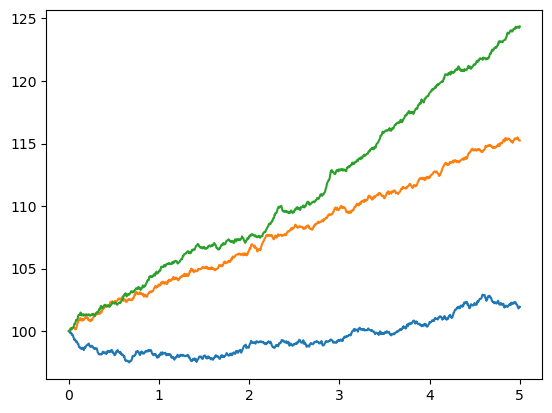

In [ ]:
T,Y=BM(100,5,1000,1,1)
plt.plot(T,Y)
T,Y=BM(100,5,1000,3,1)
plt.plot(T,Y)
T,Y=BM(100,5,1000,5,1)
plt.plot(T,Y)

### **Problem 3**

Generate 3 realizations of the process on $[0, 5]$ with:
- $Y_0 = 100, \mu = 1, N = 1000$
- $\sigma = 1, 3, 6$

Plot and identify which corresponds to each $\sigma$.

---

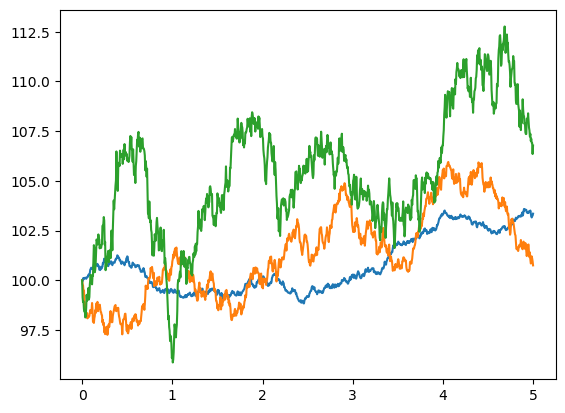

In [ ]:
T,Y=BM(100,5,1000,1,1)
plt.plot(T,Y)
T,Y=BM(100,5,1000,1,3)
plt.plot(T,Y)
T,Y=BM(100,5,1000,1,6)
plt.plot(T,Y)

## **Fitting Brownian Motion with Drift and Volatility**

Suppose we observe data at times:

$$
0 = t_0 < t_1 < \cdots < t_n
$$

and corresponding values $Y_{t_0}, Y_{t_1}, \ldots, Y_{t_n}$.

Then:
$$
Y_{t_i} - Y_{t_{i-1}} \sim N(\mu (t_i - t_{i-1}), \sigma^2 (t_i - t_{i-1})).
$$

Normalizing:
$$
\frac{Y_{t_i} - Y_{t_{i-1}}}{\sqrt{t_i - t_{i-1}}} \sim N(\mu, \sigma^2).
$$

Estimate:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} \frac{Y_{t_i} - Y_{t_{i-1}}}{\sqrt{t_i - t_{i-1}}}
$$

$$
\hat{\sigma} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} \left( \frac{Y_{t_i} - Y_{t_{i-1}}}{\sqrt{t_i - t_{i-1}}} - \hat{\mu} \right)^2 }
$$

---

### **Problem 4**

Write a function that takes:
- times $(t_0, t_1, \ldots, t_n)$  
- observed values $(Y_{t_0}, \ldots, Y_{t_n})$

and returns:
- $Y_0$
- $\hat{\mu}$
- $\hat{\sigma}$

---

In [ ]:
def FitBM(T,Y):
    Tdiff=np.diff(T)
    Z=np.diff(Y)/np.sqrt(Tdiff)
    muhat=np.mean(Z)
    sigmahat=np.std(Z)
    return Y[0],muhat,sigmahat

### **Problem 5**

Using the dataset **CoffeePrices.csv**:
1. Plot prices vs. day.  
2. Fit a Brownian motion with drift $\mu$ and volatility $\sigma$.  
3. Report $\hat{\mu}$ and $\hat{\sigma}$.

---

1.7
0.016319492817612295
0.07237447666248342


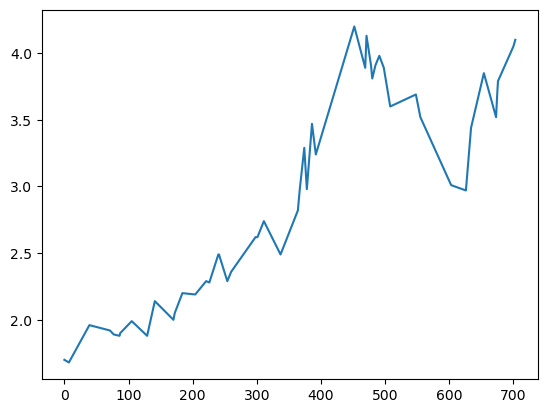

In [ ]:
import pandas as pd
df=pd.read_csv("CoffeePrices.csv")
M=df.values
Prices=list(M[:,0]) # convert column to list
Prices=[x.replace("$","") for x in Prices] # get rid of $'s
Prices=[float(x) for x in Prices] # convert to float
Prices=np.array(Prices) # create numpy array
Days=M[:,1].astype(np.float32)

plt.plot(Days,Prices)
Y0,muhat,sigmahat=FitBM(Days,Prices)
print(Y0)
print(muhat)
print(sigmahat)

In [ ]:
print(4.10+10*muhat)
print(sigmahat*np.sqrt(10))

4.263194928176123
0.22886819071614906


### **Problem 6**

Assume the fitted model from Problem 5 is correct.  
Find the **conditional distribution** of the coffee price:
- 10 days after the last observation, and  
- 30 days after the last observation.

---

We can apply the independent increments property which says that the distribution of $Y_t - Y_s$ 
is $N(\mu(t-s),\sigma^2 (t-s)).$ If we know $Y_s$ then the conditionan distribution of $Y_t$
given $Y_s$ is $N(Y_s + \mu(t-s),\sigma^2 (t-s)).$

The price on the last day (day s)  is $4.10,$ so in 10 days (day t) the distribution of price is normal with a mean of $4.10 + \hat{\mu} \times 10$ and a standard deviation of $\hat{\sigma}\times \sqrt{10}.$
We compute these in the cell below. In 30 days, we get a mean of $4.10 + \hat{\mu} \times 30$ and a standard deviation of $\hat{\sigma}\times \sqrt{30}.$

In [ ]:
print("mean in 10 days = " + str(round(4.10+10*muhat,2)))
print("std in 10 days = "+str(round(sigmahat*np.sqrt(10),2)))
print("mean in 30 days = " + str(round(4.10+30*muhat,2)))
print("std in 30 days = "+str(round(sigmahat*np.sqrt(30),2)))


mean in 10 days = 4.26
std in 10 days = 0.23
mean in 30 days = 4.59
std in 30 days = 0.4


## **Geometric Brownian Motion (GBM)**

To ensure positive values (e.g. for stock prices), define:

$$
X_t = e^{Y_t} = X_0 e^{\mu t + \sigma B_t}.
$$

Then:
$$
\log X_t = \log X_0 + \mu t + \sigma B_t.
$$

For $0 < s < t$:
$$
\log X_t - \log X_s \sim N(\mu (t-s), \sigma^2 (t-s)).
$$

Thus:
$$
\frac{X_t}{X_s} \text{ is lognormal.}
$$

---

### **Problem 7**

Fit a GBM model to observed data:
- Input: times and observed $Y_t$
- Output: $Y_0, \hat{\mu}, \hat{\sigma}$

---

In [ ]:
def FitGBM(T,Y):
    LY=np.log(Y)
    Tdiff=np.diff(T)
    Z=np.diff(LY)/np.sqrt(Tdiff)
    muhat=np.mean(Z)
    sigmahat=np.std(Z)
    return Y[0],muhat,sigmahat

### **Problem 8**

Given $( C > 0, \Delta > 0, \mu \in \mathbb{R}, \sigma > 0 )$:

Compute the **expected value** and **standard deviation** of:
$$
C e^{V}, \quad V \sim N(\mu \Delta, \sigma^2 \Delta)
$$

$$
E[Z] = e^{\nu + \frac{1}{2}\tau^2}, \quad
\text{Std}(Z) = e^{\nu + \frac{1}{2}\tau^2}\sqrt{e^{\tau^2} - 1}.
$$

---

In [ ]:
def f(C,Delta,mu,sigma):
    mean=np.exp(mu*(Delta)+.5*(sigma**2)*Delta)
    std=mean*np.sqrt(np.exp(Delta*sigma**2)-1)
    return C*mean, C*std

### **Problem 9**

Fit a **GBM** model to the coffee price data.  
Compute the conditional expected value and standard deviation:
- 10 days after last observation  
- 30 days after last observation

---

In [ ]:
Y0,muhat,sigmahat=FitGBM(Days,Prices)
mean,std=f(4.10,10,muhat,sigmahat)
print("mean in 10 days = " + str(round(mean,2)))
print("std in 10 days = "+str(round(std,2)))
Y0,muhat,sigmahat=FitGBM(Days,Prices)
mean,std=f(4.10,30,muhat,sigmahat)
print("mean in 30 days = " + str(round(mean,2)))
print("std in 30 days = "+str(round(std,2)))


mean in 10 days = 4.36
std in 10 days = 0.31
mean in 30 days = 4.92
std in 30 days = 0.61


## **Higher-Dimensional Brownian Motion**

For 2D Brownian motion, steps are chosen from:

$$
(dx, dy) \in \{(1, 0), (-1, 0), (0, 1), (0, -1)\}
$$

each with probability $1/4$.

The path satisfies:
$$
(X_{n\Delta}, Y_{n\Delta}) = (X_{(n-1)\Delta}, Y_{(n-1)\Delta}) + (dx_n, dy_n)
$$

and is linearly interpolated for all $t \in [0, T]$.

---

### **Problem 10**

Create a function that takes:
- $T$: total time  
- $(x_0, y_0)$: starting point  
- $N$: number of steps ($\Delta = T/N$)

and returns an $(N+1) \times 3$ array with:
- Column 1: time points  
- Column 2: $X_t$  
- Column 3: $Y_t$

---

In [ ]:
def BrownianMotionIn2d(startpos,T,N):
    M=np.zeros((N+1,3))
    delta=np.sqrt(T/N)*np.random.normal(0,1,(N+1,2))
    delta[0,0]=startpos[0]
    delta[0,1]=startpos[1]
    deltacumsum=np.cumsum(delta,axis=0)  
    M[:,0]=np.linspace(0,T,N+1)
    M[:,1:3]=deltacumsum
    return(M)

### **Problem 11**

Generate 3 realizations of 2D Brownian motion on $[0,5]$, starting at $(1,1)$, with $N = 1000$.  
Plot the resulting trajectories.

---

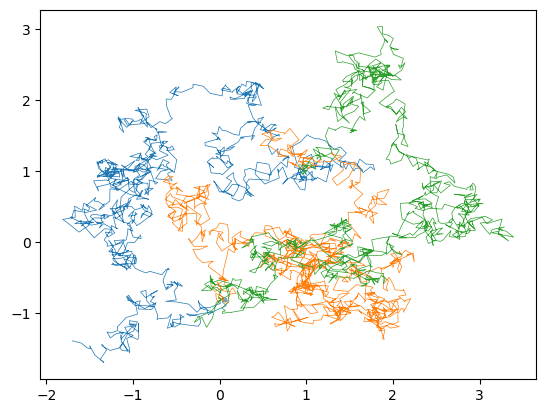

In [ ]:
M=BrownianMotionIn2d((1,1),5,1000)
plt.plot(M[:,1],M[:,2],linewidth=.5)
M=BrownianMotionIn2d((1,1),5,1000)
plt.plot(M[:,1],M[:,2],linewidth=.5)
M=BrownianMotionIn2d((1,1),5,1000)
plt.plot(M[:,1],M[:,2],linewidth=.5)

### **Problem 12**


Start 2D Brownian motion at $(0,0)$ and stop when the path first hits:
- an **arc** of radius $r < 1$ between angles $\theta$ and $2\pi - \theta$, or  
- the **unit circle**.

Return:
- The time of first hit  
- Boolean indicating whether the arc or unit circle was hit first.

---
Note that if we take epsilon to be too small relative to the square root of Delta we can jump over the smaller circle easily.

In [2]:
import numpy as np
def realization_of_hit(r,theta,Delta,epsilon):
    sqrtDelta=np.sqrt(Delta)
    epssq=epsilon**2
    X=0
    Y=0
    t=0
    while True:
        d=np.sqrt(X**2+Y**2)
        if d>=1:
            return t,False
        if d>0:
            Xproj=r*X/d
            Yproj=r*Y/d
            if (X-Xproj)**2+(Y-Yproj)**2<epssq:
                if np.arccos(np.abs(Xproj/r))>theta:
                    return t,True
        X+=sqrtDelta*np.random.normal(0,1)
        Y+=sqrtDelta*np.random.normal(0,1)
        t+=Delta
r=.5
theta=np.pi/4
Delta=.00001
epsilon=.5*np.sqrt(Delta)
for i in range(10):
    print(realization_of_hit(r,theta,Delta,epsilon))

(0.132759999999992, True)
(0.0361700000000004, True)
(0.09120999999999733, True)
(0.11843999999998678, True)
(0.3566400000002159, True)
(0.15800000000001724, False)
(0.0364900000000005, True)
(0.2020700000000613, True)
(0.325760000000185, True)
(0.1078199999999909, True)


### **Problem 13**

Using the code from Problem 12, estimate:
- the probability of hitting the arc before the circle,  
- the expected time of first hit,  
- and the conditional expected time to hit the arc given it occurs first.

Here we run Brownian motion until a hit occurs 10,000 times and store the results in a list.

In [ ]:
ntrials=10000
r=.5
theta=np.pi/4
Delta=.00001
epsilon=.5*np.sqrt(Delta)
L=[]
for i in range(ntrials):
    res=realization_of_hit(r,theta,Delta,epsilon)
    L.append(res)

Estimated probability of hitting the arc first

In [ ]:
pest=sum([x[1] for x in L])/ntrials
print(round(pest,2))

0.27


Estimated expected time it takes to hit either arc or unit circle.

In [ ]:
est=sum([x[0] for x in L])/ntrials
print(round(est,2))

0.13


Expected time we hit given that we hit the arc first.

In [ ]:
Lnew=[x[0] for x in L if x[1]]
est=sum(Lnew)/len(Lnew)
print(round(est,2))

0.12


Here we run Brownian motion until a hit occurs 10,000 times and store the results in a list.

In [ ]:
ntrials=10000
r=.1
theta=np.pi/4
Delta=.00001
epsilon=.5*np.sqrt(Delta)
L=[]
for i in range(ntrials):
    res=realization_of_hit(r,theta,Delta,epsilon)
    L.append(res)

Estimated probability of hitting the arc first

In [ ]:
pest=sum([x[1] for x in L])/ntrials
print(round(pest,2))

0.29


Estimated expected time it takes to hit either arc or unit circle.

In [ ]:
est=sum([x[0] for x in L])/ntrials
print(round(est,2))

0.01


Expected time we hit given that we hit the arc first.

In [ ]:
Lnew=[x[0] for x in L if x[1]]
est=sum(Lnew)/len(Lnew)
print(round(est,2))

0.01


In [ ]:
import numpy as np
def realization_of_hit(r,theta,Delta,epsilon):
    sqrtDelta=np.sqrt(Delta)
    epssq=epsilon**2
    X=0
    Y=0
    t=0
    L=[[X,Y]]
    while True:
        d=np.sqrt(X**2+Y**2)
        if d>r:
            return t,False,np.array(L)
        if d>0:
            Xproj=r*X/d
            Yproj=r*Y/d
            if (X-Xproj)**2+(Y-Yproj)**2<epssq:
                if np.arccos(np.abs(Xproj/r))>theta:
                    return t,True,np.array(L)
        X+=sqrtDelta*np.random.normal(0,1)
        Y+=sqrtDelta*np.random.normal(0,1)
        L.append([X,Y])
        t+=Delta
r=.5
theta=np.pi/4
Delta=.00001
epsilon=.5*np.sqrt(Delta)
res=realization_of_hit(r,theta,Delta,epsilon)
print(res[0])
print(res[1])


0.11447999999998831
False


0.4879837745852658 0.13582822179283097
0.48168833262625055
0.5065347669152493


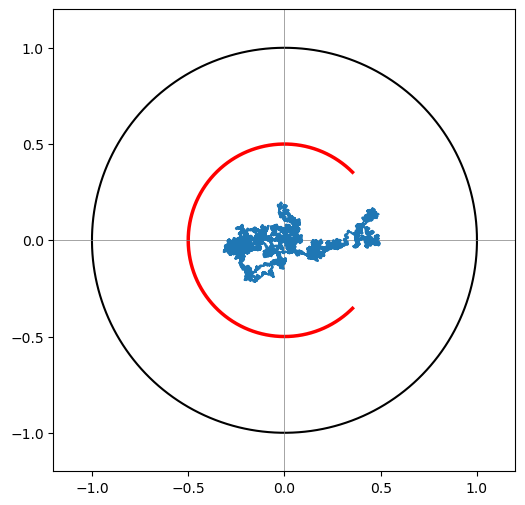

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

r=.5
theta=np.pi/4

# Parameters
r_small = r
theta_range = np.linspace(theta,2*np.pi-theta, 300)

# Coordinates for unit circle
x_unit = np.cos(np.linspace(0, 2*np.pi, 400))
y_unit = np.sin(np.linspace(0, 2*np.pi, 400))

# Coordinates for arc of smaller circle
x_arc = r_small * np.cos(theta_range)
y_arc = r_small * np.sin(theta_range)

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_unit, y_unit, 'k-')
ax.plot(x_arc, y_arc, 'r', linewidth=2.5)

# Style
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

X=res[2][:,0]
Y=res[2][:,1]
plt.plot(X,Y)
d=np.sqrt(X[-1]**2+Y[-1]**2)
Xproj=r*X[-1]/d
print(X[-1],Y[-1])
print(Xproj)
print(d)

plt.show()
